# 4.1. Format chung của một biểu đồ trên matplotlib

Bộ dữ liệu mẫu được lựa chọn trong chương này là `iris` dataset. Đây là một bộ dữ liệu được sử dụng trong nhiều ví dụ minh hoạ về visualization. Bộ dữ liệu sẽ cho chúng ta biết kích thước dài, rộng của đài hoa và cánh hoa của 3 giống hoa iris là `Setosa`, `Versicolor` và `Virginica`. Cụ thể các trường như sau:

* Sepal Length: Độ dài đài hoa
* Sepal Width: Độ rộng đài hoa
* Petal Length: Độ dài cánh hoa
* Petal Width: Độ rộng cánh hoa

In [1]:
import pandas as pd

df_iris = pd.read_csv("https://raw.githubusercontent.com/phamdinhkhanh/datasets/master/iris_train.csv", header=0, index_col=None)
df_iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,4.7,3.2,1.3,0.2,setosa
1,5.0,3.6,1.4,0.2,setosa
2,5.4,3.9,1.7,0.4,setosa
3,4.6,3.4,1.4,0.3,setosa
4,4.9,3.1,1.5,0.1,setosa


Thống kê mô tả các trường của bộ dữ liệu

In [2]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,105.000000,105.000000,105.000000,105.00000
mean,5.812381,3.076190,3.726667,1.18381
std,0.784305,0.455843,1.749080,0.74616
min,4.400000,2.200000,1.000000,0.10000
25%,5.200000,2.800000,1.600000,0.30000
50%,5.700000,3.000000,4.200000,1.30000
75%,6.300000,3.400000,5.100000,1.80000
max,7.900000,4.400000,6.900000,2.50000


Tiếp theo chúng ta sẽ xem độ dài cánh hoa trung bình ở mỗi loài là bao nhiêu:

In [3]:
import numpy as np

df_summary = df_iris[['Species', 'Petal.Length']].groupby('Species').mean()
x, y = list(df_summary.index), df_summary['Petal.Length'].values
print(x)
print(y)

['setosa', 'versicolor', 'virginica']
[1.47142857 4.18285714 5.52571429]


Vẽ một biểu đồ barchart đơn giản trên matplotlib và cùng phân tích cách thức dựng biểu đồ sẽ như thế nào?

Text(0.5, 1.0, 'Average of Petal Length')

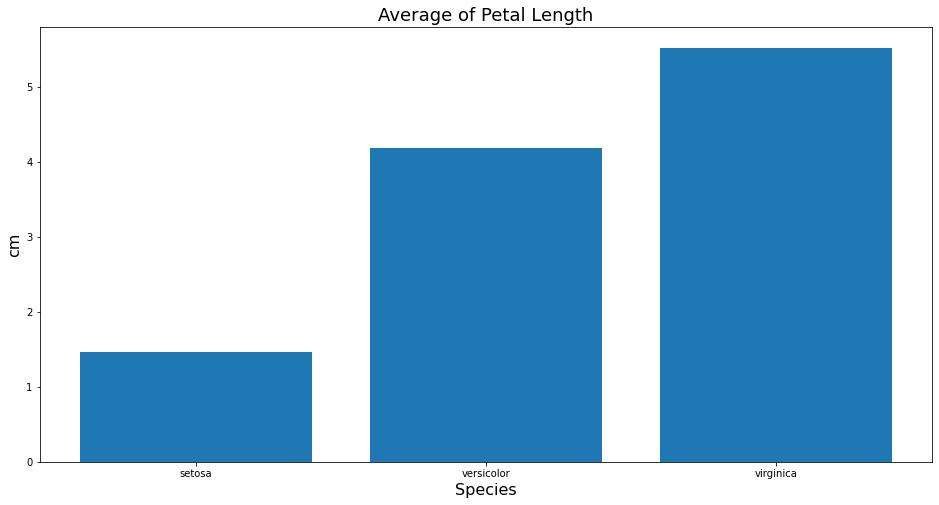

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.bar(x, y)
plt.xlabel('Species', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.title("Average of Petal Length", fontsize=18)

Các bạn sẽ hình dung các bước để vẽ biểu đồ trên matplotlib như sau:

**Step 1**: Thống kê dữ liệu và lựa chọn biểu đồ. Ở bước này chúng ta cần phải xác định được mục tiêu của phân tích là gì? Sau đó xác định loại biểu đồ phù hợp để làm nổi bật thông tin. Dạng biểu đồ nào sẽ được sử dụng cho những mục đích cụ thể nào sẽ được trình bày ở chương tiếp theo.

**Step 2**: Tiến hành visualization. Bước này đơn thuần là vận dụng matplotlib để vẽ biểu đồ. Hãy nhìn vào những câu lệnh ở ví dụ visualization trên. Nếu tinh tế bạn sẽ thấy chúng ta trải qua các bước:

- Khởi tạo figure cho đồ thị: Muốn dựng một đồ thị thì trước tiên ta phải dựng khung cho nó thông qua hàm `plt.figure()`. Bên trong hàm này chúng ta khai báo kích thước `(w, h)` của đồ thị thông qua `figuresize=(w, h)`.

- Vẽ biểu đồ: Sau khi đã có khung hình rồi, chúng ta sẽ tiến hành vẽ đồ thị. Tuỳ vào tính chất của dữ liệu mà chúng ta sẽ quyết định lựa chọn loại đồ thị phù hợp như đồ thị `barchart, line, scatter, pie, area, boxplot`. Bên trong hàm vẽ đồ thị chúng ta sẽ khai báo trục x và y và điều chỉnh các định dạng font chữ, màu sắc, loại đường viền đồ thị cho hài hoà và đẹp mắt.

- Khai báo tiêu đề: Chúng ta có thể tạo tiêu đề cho các trục x, y và tiêu đề của đồ thị.

**Step 3**: Sau khi dựng đồ thị xong thì bạn nên nêu ra những nhận xét, đánh giá được kết luận từ đồ thị. Đó là những thông tin hữu ích cho mô hình và việc ra quyết định.

Tiếp theo chúng ta sẽ tìm hiểu các biểu đồ cơ bản trên matplotlib, những cách customize sâu biểu đồ trên matplotlib và làm thế nào để tạo ra một biểu đồ đẹp.

# 4.2. Các biểu đồ cơ bản trên matplotlib

## 4.2.1. Line

Biểu đồ line là biểu đồ mà các điểm được nối với nhau bằng những đoạn thẳng. Biểu đồ line thường phù hợp với mục đích thể hiện trend tăng/giảm ở chuỗi thời gian và dữ liệu so sánh giữa các nhóm trong biến _category_.

Để vẽ biểu đồ line chúng ta dùng hàm `plt.plot()`. Bên trong cần khai báo trục $x$ và $y$ hoặc chỉ trục $y$ (giá trị index của $x$ khi đó sẽ tự được sinh ra).

Text(0.5, 1.0, 'Average of Petal Length')

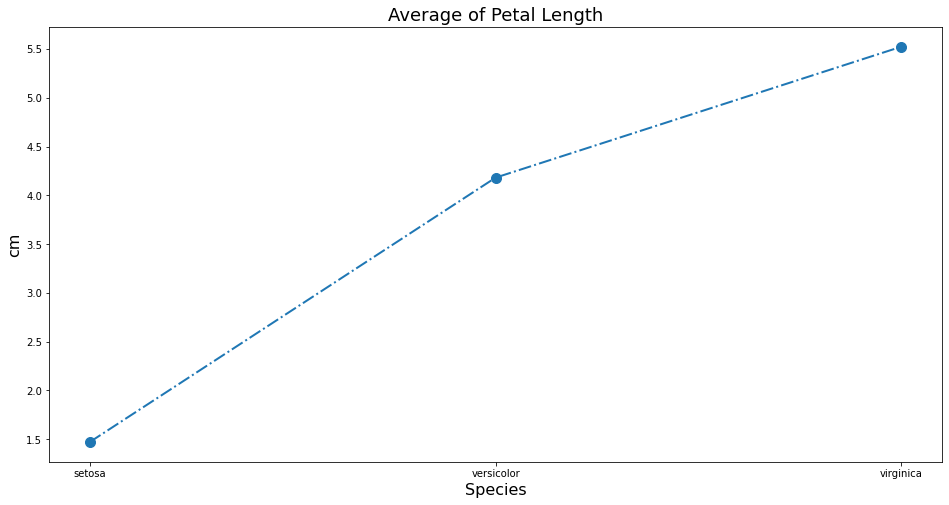

In [5]:
# Vẽ biểu đồ line độ dài cánh hoa trung bình giữa các loài hoa
plt.figure(figsize=(16, 8))
plt.plot(x, y, marker='o', markersize=10, linestyle='-.', linewidth=2)
plt.xlabel('Species', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.title("Average of Petal Length", fontsize=18)

Các đối số `marker` và `linestyles` lần lượt qui định:

* marker: Qui định hình dạng của point đánh dấu các điểm $(x, y)$ trên toạ độ. Marker nhận các kiểu `o, ^, s` lần lượt tương ứng với hình tròn, hình tam giác, hình vuông (s là viết tắt của square).

* markersize: Kích thước của point.

* linestyles: Qui định kiểu của đoạn thẳng nối các points. Có thể nhận các giá trị `--, -., -, :`

* linewidth: Kích thước của đoạn thẳng.

## 4.2.2. Barchart

Biểu đồ barchart phù hợp với mục đích so sánh gía trị giữa các nhóm khác nhau. Chẳng hạn như so sánh độ dài cánh hoa trung bình giữa các nhóm.

Để vẽ biểu đồ barchart chúng ta sử dụng hàm `plt.bar()` như biểu đồ đầu tiên. Chúng ta cũng có thể kết hợp nhiều loại biểu đồ trong cùng một biểu đồ bằng cách dùng liên tiếp các câu lệnh vẽ biểu đồ như sau:

Text(0.5, 1.0, 'Average of Petal Length')

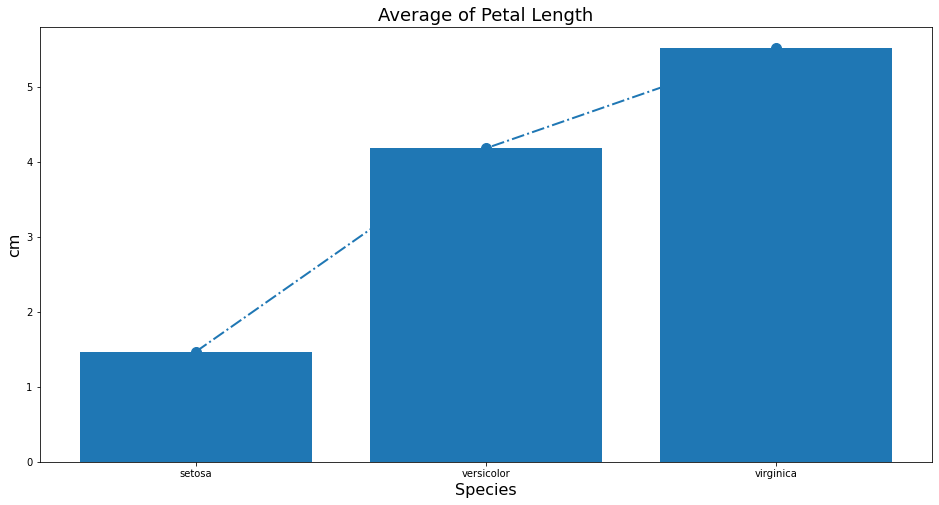

In [6]:
# Vẽ biểu đồ line độ dài cánh hoa trung bình giữa các loài hoa
plt.figure(figsize=(16, 8))
plt.bar(x, y)
plt.plot(x, y, marker='o', markersize=10, linestyle='-.', linewidth=2)
plt.xlabel('Species', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.title("Average of Petal Length", fontsize=18)

## 4.2.3. Pie

Khi chúng ta muốn thể hiện thị phần của từng phân khúc hoặc tỷ lệ phần trăm của từng nhóm thì biểu đồ tròn sẽ rất phù hợp.

Bên dưới ta sẽ visualize đếm số lượng các loài hoa.

In [7]:
# Thống kê các loài hoa
x, y = np.unique(df_iris['Species'], return_counts = True)
print(x)
print(y)

['setosa' 'versicolor' 'virginica']
[35 35 35]


Text(0.5, 1.0, 'Average of Petal Length')

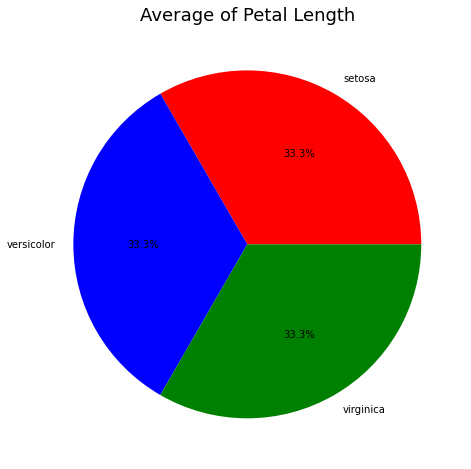

In [8]:
# Vẽ biểu đồ line độ dài cánh hoa trung bình giữa các loài hoa
plt.figure(figsize=(16, 8))
plt.pie(y,
        labels = x, # Nhãn của các nhóm
        colors = ['red', 'blue', 'green'], # Màu sắc của các nhóm
        autopct = '%1.1f%%', # Format hiển thị giá trị %
        shadow = False)
plt.title("Average of Petal Length", fontsize=18)

**Câu hỏi:** Biểu đồ pie có thể được vẽ kết hợp cùng với biểu đồ line hoặc barchart được không?

## 4.2.4. Scatter

Biểu đồ scatter được sử dụng để biểu diễn từng điểm $(x, y)$ trong đồ thị hai chiều. Trong machine learning, khi cần biểu diễn các cụm hoặc trong các tình huống muốn tìm ra phân phối của các điểm dữ liệu theo các chiều chúng ta sẽ thường dùng biểu đồ scatter.

Tiếp theo chúng ta sẽ cùng tìm ra phân phối của các điểm dữ liệu

Text(0.5, 1.0, 'Average of Petal Length')

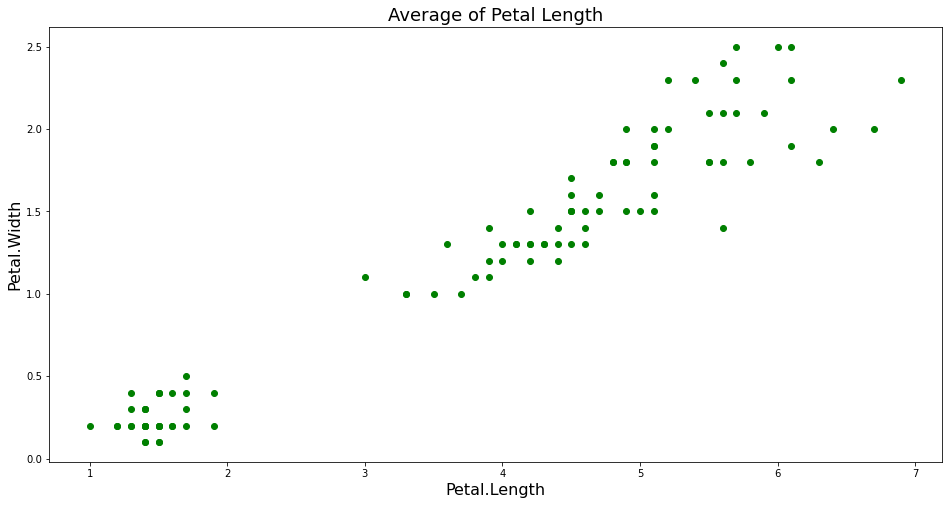

In [9]:
# lấy x, y
x = df_iris['Petal.Length'].values
y = df_iris['Petal.Width'].values
# Vẽ biểu đồ line độ dài cánh hoa trung bình giữa các loài hoa
plt.figure(figsize=(16, 8))
plt.scatter(x, y, color='green', )
plt.xlabel('Petal.Length', fontsize=16)
plt.ylabel('Petal.Width', fontsize=16)
plt.title("Average of Petal Length", fontsize=18)

Như vậy chúng ta có thể thấy kích thước của cánh hoa có thể được phân thành hai cụm một cách khá rõ ràng.

**Bài tập:** Hãy vẽ biểu đồ scatter biểu diễn toạ độ của các điểm $(x, y)$ nhận giá trị của `(Petal.Length, Petal.Width)` có màu sắc phân biệt giữa các loài hoa.

# 4.3. Các biểu đồ nâng cao trên matplotlib

Những biểu đồ nâng cao trên matplotlib là những biểu đồ thường ít được sử dụng hơn. Nó đòi hỏi người đọc phải am hiểu về thống kê và có thể phải tìm hiểu trước về nội dung được thể hiện trong những biểu đồ này để có thể đọc được. Việc đưa ra kết luận về dữ liệu từ biểu đồ này cũng khó hơn so với các biểu đồ cơ bản vì nó có độ phức tạp cao hơn. Nhưng qua chương này mình sẽ hướng dẫn các bạn đọc hiểu các biểu đồ như thế.

## 4.3.1. Boxplot

Biểu đồ box-plot giúp xác định outliers và tìm ra kiểu phân phối của dữ liệu. Cụ thể biểu đồ này xác định các ngưỡng chia tại các mức phân vị 25% (là giá trị mà có 25% quan sát nhỏ hơn giá trị này), median (hoặc mức phân vị 50%), mức phân vị 75% được ký hiệu lần lượt là $Q_1,Q_2,Q_3$. Các miền giá trị được xác định từ các ngưỡng trên sẽ tương ứng với:

- Miền giá trị thấp nhất: Chứa các quan sát từ thấp nhất (không bao gồm outliers) tới Q1.

- Miền gía trị thấp: Chứa các quan sát nằm trong khoảng từ $[Q_1,Q_2)$.

- Miền giá trị cao: Chứa các quan sát trong khoảng $[Q_2,Q_3)$.

- Miền giá trị cao nhất: Chứa các quan sát từ $Q_3$ tới giá trị cao nhất (không bao gồm outliers).

Chỉ số $IQR$ (_interquartile range_) được xác định chính bằng độ dài của hai miền giá trị cao và thấp.

$$IQR=Q_3−Q_1$$

Dựa trên $IQR$, outliers sẽ được xác định nếu nằm ngoài miền giá trị cao nhất và miền giá trị thấp nhất. Tức là nếu $x>Q_3+1.5∗IQR$ hoặc $x<Q1−1.5∗IQR$ thì sẽ được xác định là outliers.

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']


Text(0.5, 1.0, 'Boxplot of Dimensions')

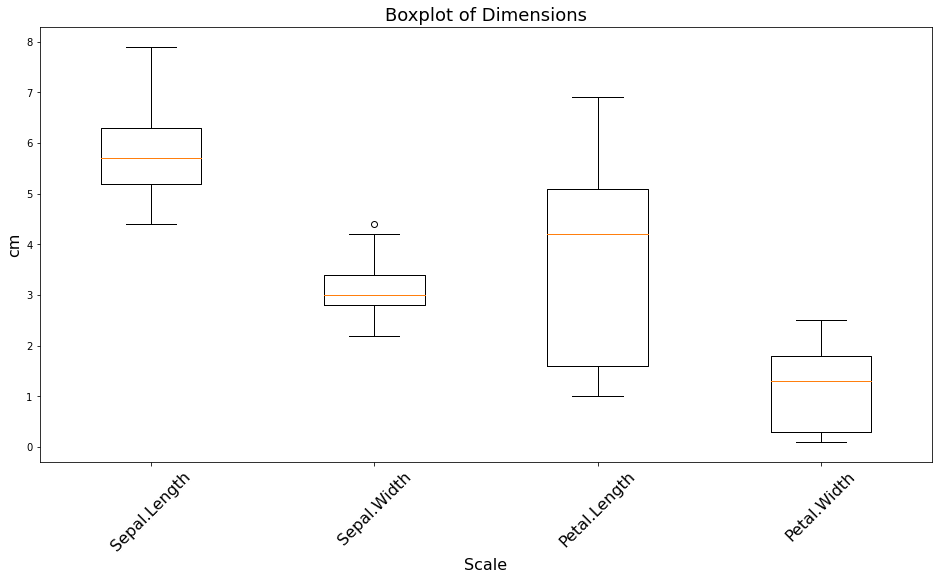

In [10]:
# Lấy ra list các chiều dimension cần khảo sát
dims = list(df_iris.select_dtypes('float').columns)
print(dims)

# Vẽ biểu đồ bboxplot
plt.figure(figsize=(16, 8))
plt.boxplot([df_iris[col] for col in dims])
plt.xlabel('Scale', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.xticks(np.arange(len(dims))+1, dims, rotation=45, fontsize=16)
plt.title("Boxplot of Dimensions", fontsize=18)

Nhìn vào biểu đồ ta có thể thấy `Sepal.Width` có một giá trị outlier nằm ở vị trí lớn nhất. Các phân phối `Petal.Width, Petal.Length` có xu hướng lệch phải khi median nằm gần ngưỡng $Q_3$ (ứng với quantile 75%) hơn. `Sepal.Length` có phân phối tương đối cân đối về hai phía trong khi `Sepal.Width` có phân phối lệch trái. Biểu đồ cũng cho thấy độ lớn giữa các biến khi so sánh median đó là `Sepal.Length > Petal.Length > Sepal.Width > Petal.Width`.

## 4.3.2. Swarm

`swarm` hoặc đôi khi được gọi là `beeswarm` là một dạng biểu đồ cho phép ta biểu diễn phân phối của các điểm rất tốt. Các điểm trong biểu đồ swarm được giữ đúng như giá trị thật của nó chứ không bị biến đổi như histogram hay density nên chúng ta có thể theo dõi được chính xác phân phối thực tế của dữ liệu và nhận biết outlier hiệu quả.

Để vẽ biểu đồ swarm thì chúng ta sẽ dùng package `seaborn`. Đây là package mở rộng của matplotlib nhằm cung cấp các biểu đồ mà trong matplotlib chưa hỗ trợ. Khi visualize các biểu đồ liên quan tới phân phối như `swarm, histogram, density` thì đây là một package rất hiệu quả.

Cấu trúc chung của biểu đồ `swarm` như sau:

```
sns.swarmplot(
    x=None, 
    y=None, 
    hue=None, 
    data=None
)
```

Trong đó data là bảng dữ liệu dạng pandas Dataframe chứa thông tin để vẽ biểu đồ. `x` là trục hoành, `y` là trục tung. Thông thường `x` sẽ là một biến chiều xoay (_dimension_) và `y` là một biến đo lường (_measurement_). `hue` là biến về phân loại màu sắc.

Tiếp theo chúng ta cùng visualize độ dài cánh hoa `Sepal.Length` cho các điểm thuộc về 3 loài hoa thông qua biểu đồ swarm

Text(0.5, 1.0, 'Swarm of Dimensions')

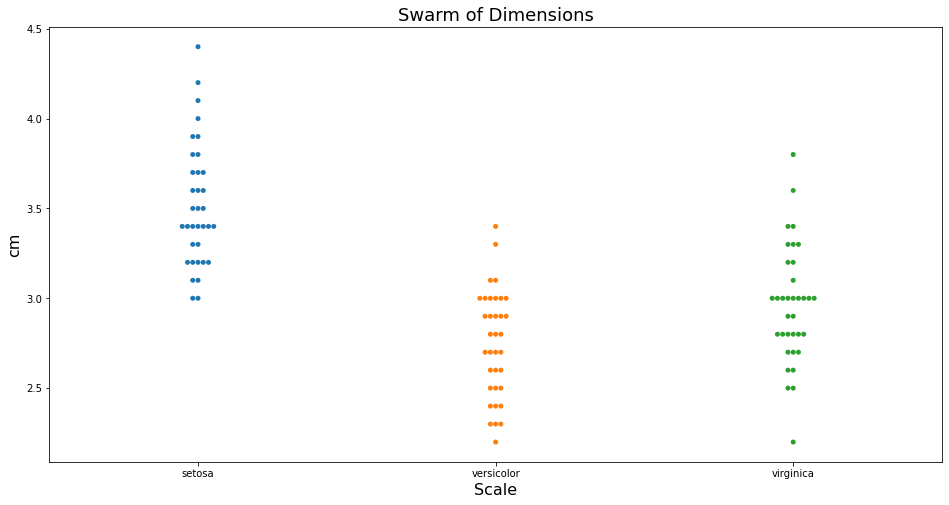

In [11]:
import seaborn as sns

# Vẽ biểu đồ swarm
plt.figure(figsize=(16, 8))
sns.swarmplot(x='Species', y='Sepal.Width', data = df_iris)
plt.xlabel('Scale', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.title("Swarm of Dimensions", fontsize=18)

Hoặc chúng ta cũng có thể xoay ngang đồ thị bằng cách đảo ngược trục `x, y` cho nhau.

Text(0.5, 1.0, 'Swarm of Dimensions')

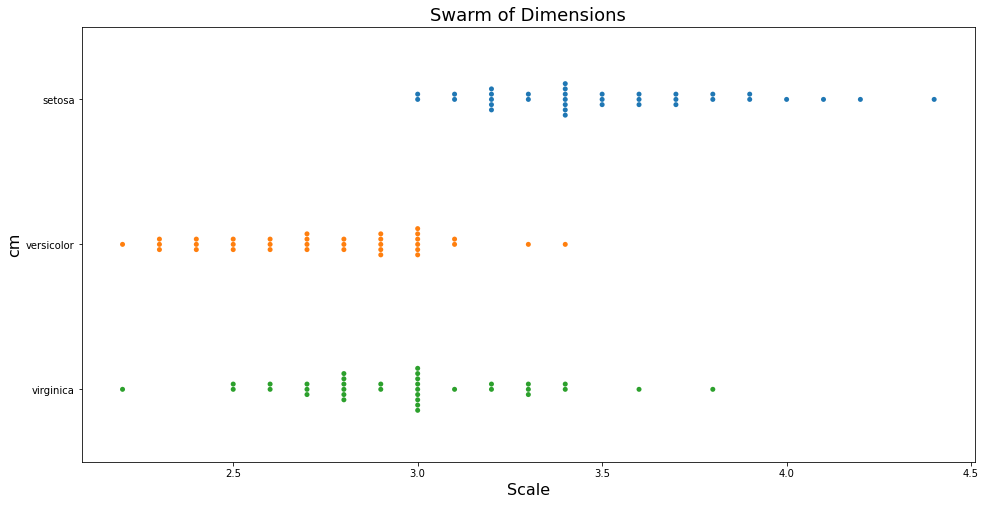

In [12]:
import seaborn as sns

# Vẽ biểu đồ swarm
plt.figure(figsize=(16, 8))
sns.swarmplot(y='Species', x='Sepal.Width', data = df_iris)
plt.xlabel('Scale', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.title("Swarm of Dimensions", fontsize=18)

Khi muốn thay đổi màu sắc theo từng loài hoa ta có thể thêm `hue=Species`.

Text(0.5, 1.0, 'Swarm of Dimensions')

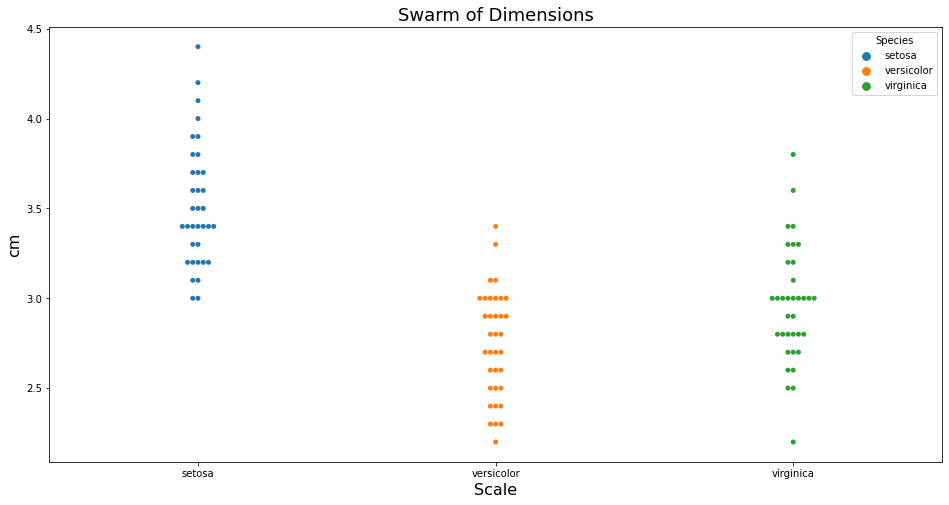

In [13]:
import seaborn as sns

# Vẽ biểu đồ swarm
plt.figure(figsize=(16, 8))
sns.swarmplot(x='Species', y='Sepal.Width', hue='Species', data = df_iris)
plt.xlabel('Scale', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.title("Swarm of Dimensions", fontsize=18)

Nhìn vào biểu đồ swarm ta có thể thấy toàn bộ các điểm đều được thể hiện trên đồ thị. Chúng ta sẽ nhận biết được đâu là miền giá trị tập trung nhiều dữ liệu nhất, đâu là các vị trí outliers.

Ngoài ra ta cũng có thể sử dụng một dạng biểu đồ khác giống như swarm nhưng đã được biến đổi thành distribution theo kernel distribution. Đó chính là biểu đồ violin.

Text(0.5, 1.0, 'Swarnplot of Sepal.Width')

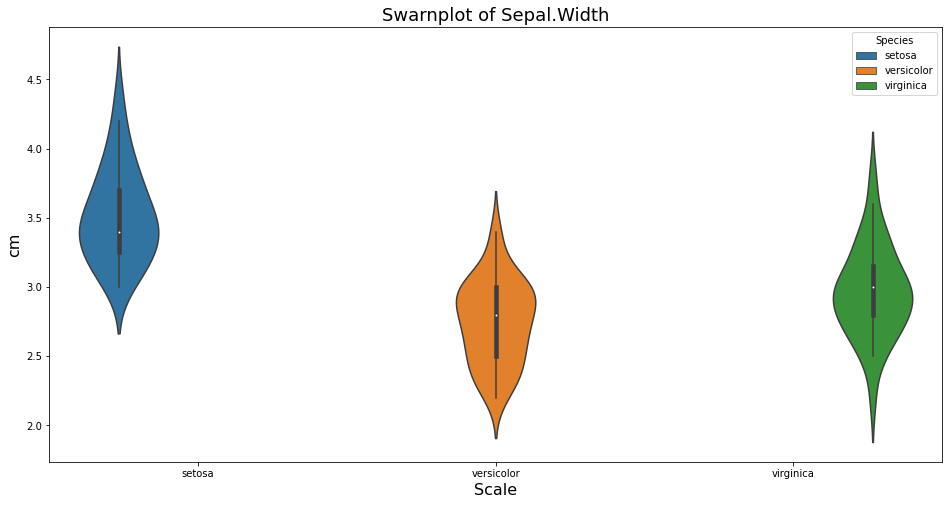

In [14]:
import seaborn as sns

# Vẽ biểu đồ swarm
plt.figure(figsize=(16, 8))
sns.violinplot(x='Species', y='Sepal.Width', hue='Species', data = df_iris)
plt.xlabel('Scale', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.title("Swarnplot of Sepal.Width", fontsize=18)

Trong biểu đồ violin thì chúng ta có quan sát được dạng của phân phối theo density plot và các ngưỡng quantile theo boxplot.

## 4.3.3. Histogram

Histogram là biểu đồ biểu diễn phân phối của các biến liên tục bằng cách chia nhỏ chúng thành những bins có độ dài bằng nhau và thống kê số lượng các quan sát rơi vào từng bins.

Text(0.5, 1.0, 'Histogram of Sepal.Width')

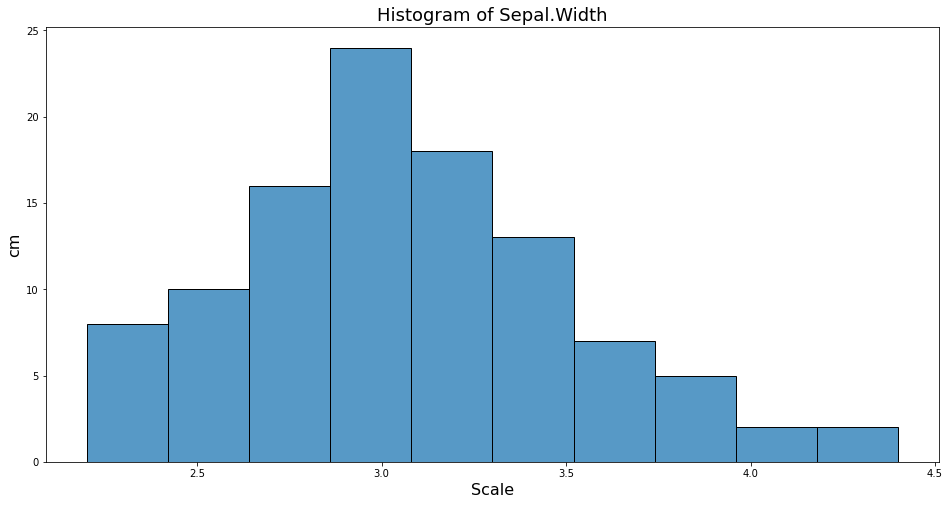

In [15]:
import seaborn as sns

# Vẽ biểu đồ swarm
plt.figure(figsize=(16, 8))
sns.histplot(x='Sepal.Width', data = df_iris, bins=10)
plt.xlabel('Scale', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.title("Histogram of Sepal.Width", fontsize=18)

Biểu đồ histogram sẽ không thể hiện rõ được xu hướng phân phối nếu ta chia các vùng của bin quá nhỏ. Vì vậy chúng ta có thể thêm một lựa chọn `kde=True` để vẽ thêm một đường density plot thể hiện mật độ phân phối liên tục hơn bên cạnh histogram.

Text(0.5, 1.0, 'Histogram of Sepal.Width')

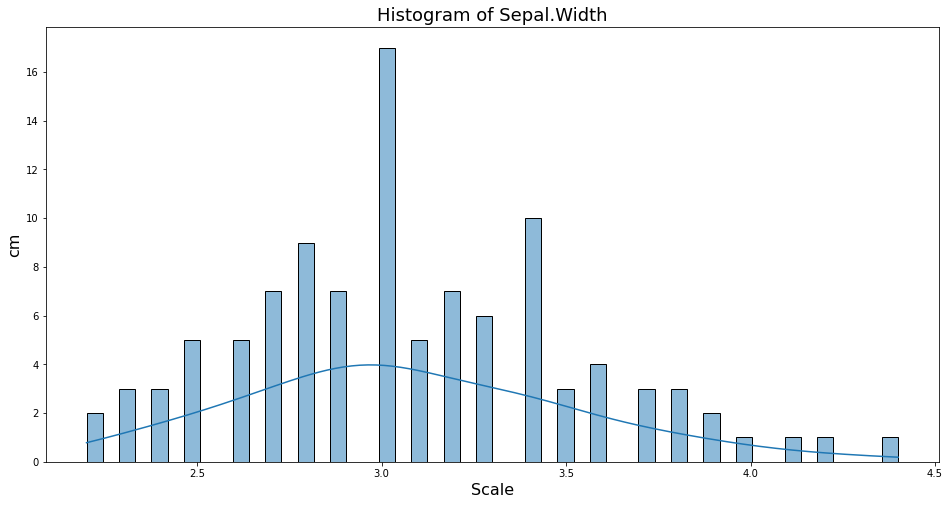

In [16]:
import seaborn as sns

# Vẽ biểu đồ swarm
plt.figure(figsize=(16, 8))
sns.histplot(x='Sepal.Width', data = df_iris, bins=50, kde=True)
plt.xlabel('Scale', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.title("Histogram of Sepal.Width", fontsize=18)

## 4.3.4. Density

Mỗi một trường dữ liệu đều có một đặc trưng riêng của nó. Để lượng hóa những đặc trưng này, thống kê học sử dụng các đại lượng thống kê mô tả như `mean, max, median, standard deviation, percentile`. Để tính thống kê mô tả cho một dataset dạng pandas dataframe đơn giản là ta sử dụng hàm describe().

In [17]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,105.000000,105.000000,105.000000,105.00000
mean,5.812381,3.076190,3.726667,1.18381
std,0.784305,0.455843,1.749080,0.74616
min,4.400000,2.200000,1.000000,0.10000
25%,5.200000,2.800000,1.600000,0.30000
50%,5.700000,3.000000,4.200000,1.30000
75%,6.300000,3.400000,5.100000,1.80000
max,7.900000,4.400000,6.900000,2.50000


Tuy nhiên không phải lúc nào thống kê mô tả cũng là duy nhất đối với một trường dữ liệu. Một ví dụ tiêu biểu mà chúng ta có thể xem xét là phân phối `hình chú khủng long`.

![](https://raw.githubusercontent.com/rweekly/image/master/2017-03/AllDinosGrey_1_scale.png)

> Phân phối hình chú khủng long và các hình bên dưới có hình dạng hoàn toàn khác biệt nhau nhưng đều dựa trên 2 biến $(X, Y)$ có chung thống kê mô tả mean, phương sai và hệ số tương quan.

Tất cả những phân phối trên đều có chung thống kê mô tả nhưng chúng khác xa nhau về bản chất của phân phối. Do đó không nên hoàn toàn tin tưởng vào thống kê mô tả mà bên cạnh đó chúng ta cần visualize phân phối của dữ liệu.

Trong thống kê mỗi một biến liên tục được đặc trưng bởi một hàm mật độ xác suất (`pdf - probability density function`). Các phân phối điển hình như `standard normal, T-student, poisson, fisher, chi-squared` đều có những hình dạng phân phối xác suất khác nhau.

![](https://phamdinhkhanh.github.io/assets/images/20190916_VisualizationPython/common_pdf_shape.png)


> Đồ thị hàm mật độ xác suất của những phân phối xác suất standard normal, T-student, poisson, fisher, chi-squared.

Về mặt lý thuyết (_theoreotical_) những phân phối này đều dựa trên những phương trình đáng tin cậy.

Trong thực nghiệm (_empirical_) nhiều bộ dữ liệu cho thấy có hình dạng tương đồng với những phân phối này.

Để tìm ra một hình dạng tương đối cho hàm mật độ xác suất của một bộ dữ liệu chúng ta sẽ sử dụng phương pháp KDE (kernel density estimate)

**KDE là gì?**

Hãy tưởng tượng tại mỗi một quan sát ta có đường cong phân phối đặc trưng. Hàm kernel sẽ giúp xác định hình dạng của đường cong trong khi độ rộng của đường cong được xác định bởi `bandwidth - h` (bandwidth horizontal, là độ rộng của KDE xác định theo chiều ngang). Phương pháp KDE sẽ tính tổng của các đường cong chạy dọc theo trục  để hình thành nên đường cong mật độ xác suất tổng quát cho dữ liệu.

![](https://phamdinhkhanh.github.io/assets/images/20190916_VisualizationPython/kde_shape.png)

> Phương pháp KDE giúp xây dựng hình dạng phân phối của dữ liệu. Ở những nơi có nhiều điểm dữ liệu tập trung thì số lượng các đường cong chồng lấn lên nhau sẽ nhiều hơn và do đó khi tính tổng cộng dồn của nó ta sẽ thu được một giá trị lũy kế kernel density lớn hơn và trái lại với những nơi có nhiều ít điểm dữ liệu tập trung.


Ngoài ra hình dạng `bandwidth - h` sẽ giúp xác định mức độ khái quát hoặc chi tiết của đường cong. Nếu ta muốn đường cong smoothing hơn thì cần thiết lập h lớn hơn và đường cong mấp mô hơn thì h cần nhỏ hơn. Tuy nhiên bạn đọc cũng không cần quá quan tâm đến bandwidth vì cách tốt hơn là sử dụng giá trị mặc định được tính trong matplotlib.

Bên dưới ta sẽ thực hành vẽ hàm mật độ xác suất của `Sepal.Width` thông qua hàm distplot() của package seaborn.

/home/khanh/miniconda3/envs/deepai-book/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density of Sepal.Width')

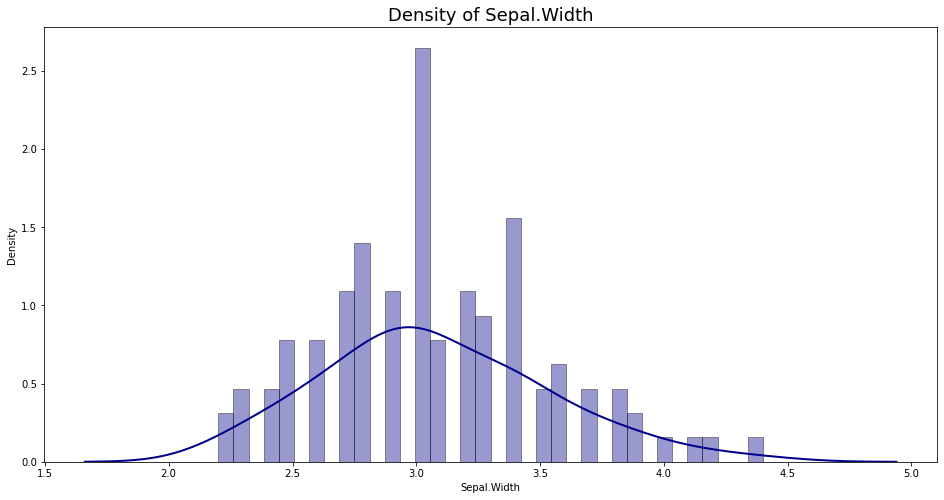

In [18]:
import seaborn as sns

# Vẽ biểu đồ density
plt.figure(figsize=(16, 8))
sns.distplot(df_iris['Sepal.Width'], 
             hist = True, 
             bins=int(180/5),
             kde = True,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':2})
plt.title("Density of Sepal.Width", fontsize=18)

## 4.3.5. Heatmap matrix

Heatmap maxtrix là biểu đồ biểu diễn các giá trị của các ma trận có độ lớn thay đổi theo màu sắc. Biều đồ này hay ở chỗ các giá trị càng lớn thì màu sắc càng sáng và giá trị nhỏ thì màu sắc sẽ tối hơn.

Đây là biểu đồ thường được sử dụng để visualize kết quả confusion-matrix của mô hình phân loại hay kết quả của ma trận hệ số tương quan giữa các biến.

Tiếp theo ta sẽ thống kê trung bình của các measurements theo các loài hoa và vẽ biểu đồ heatmap matrix thể hiện độ lớn giữa từng loài hoa theo các metric.

In [19]:
# Thống kê trung bình các measurements của các loài hoa
df_summary = df_iris.groupby('Species').mean()
df_summary

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.071429,3.517143,1.471429,0.251429
versicolor,5.825714,2.748571,4.182857,1.311429
virginica,6.540000,2.962857,5.525714,1.988571


Vẽ biểu đồ heatmap thể hiện tương quan giữa độ lớn của giá trị trung bình theo màu sắc.

<AxesSubplot:ylabel='Species'>

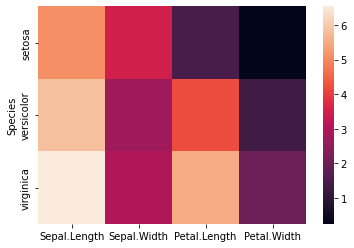

In [20]:
sns.heatmap(df_summary)

Chúng ta muốn thể hiện con số trên biểu đồ thì dùng thêm `annot=True`

<AxesSubplot:ylabel='Species'>

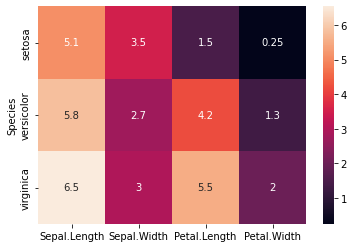

In [21]:
sns.heatmap(df_summary, annot=True)

Như vậy nhìn vào biểu đồ ta có thể thấy `Virginica` là loài hoa có `Sepal.Length` và `Petal.Length` rất cao thể hiện qua màu sắc rất sáng. `Sentosa` thì có kích thước `Petal.Length` và `Petal.Width` khá nhỏ. `Versicolor` thì có độ dài `Petal.Length` và `Sepal.Length` cao nhưng `Petal.Width` và `Sepal.Width` thấp, điều này chứng tỏ một kiến trúc dẹt của giống hoa này.

# 4.4. Vẽ nhiều biểu đồ con trên một biểu đồ

Trong báo cáo và phân tích nhiều tình huống đòi hỏi chúng ta cần đưa ra thông tin từ nhiều biểu đồ liên quan. Do đó ta cần thể hiện nhiều biểu đồ trên cùng một đồ thị để dễ đối chiếu và kết luận.

matplotlib cho phép chúng ta vẽ các biểu đồ con trên cùng một biểu đồ thông qua một grid matrix.

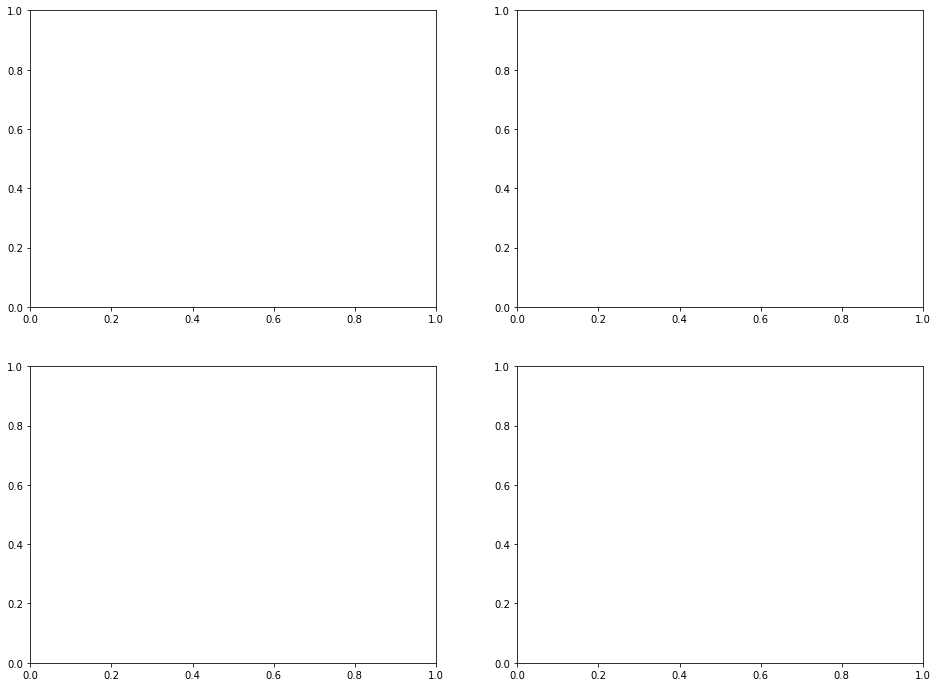

In [22]:
import matplotlib.pyplot as plt

# Khởi tạo grid matrix
fg, ax = plt.subplots(2, 2, figsize=(16, 12))

Như vậy lưới ma trận này sẽ giúp xác định có bao nhiêu biểu đồ con nằm trong nó. Trong ví dụ này chúng ta đã xác định `plt.subplots(row, height)` để tạo ra ma trận biểu đồ kích thước `2x2` (số dòng trước, cột sau). `figsize` chính là kích thước cho toàn bộ biểu đồ cha. Để truy cập vào một biểu đồ con thì chúng ta truy cập như đối với mảng trong numpy.

In [23]:
# Thống kê số lượng loài hoa
x1, y1 = np.unique(df_iris['Species'], return_counts=True)

# Sepal.Length and Sepal.Width
x2, y2 = df_iris['Sepal.Length'].values, df_iris['Sepal.Width'].values

Text(0.5, 0.98, 'Biểu đồ Tổng hợp')

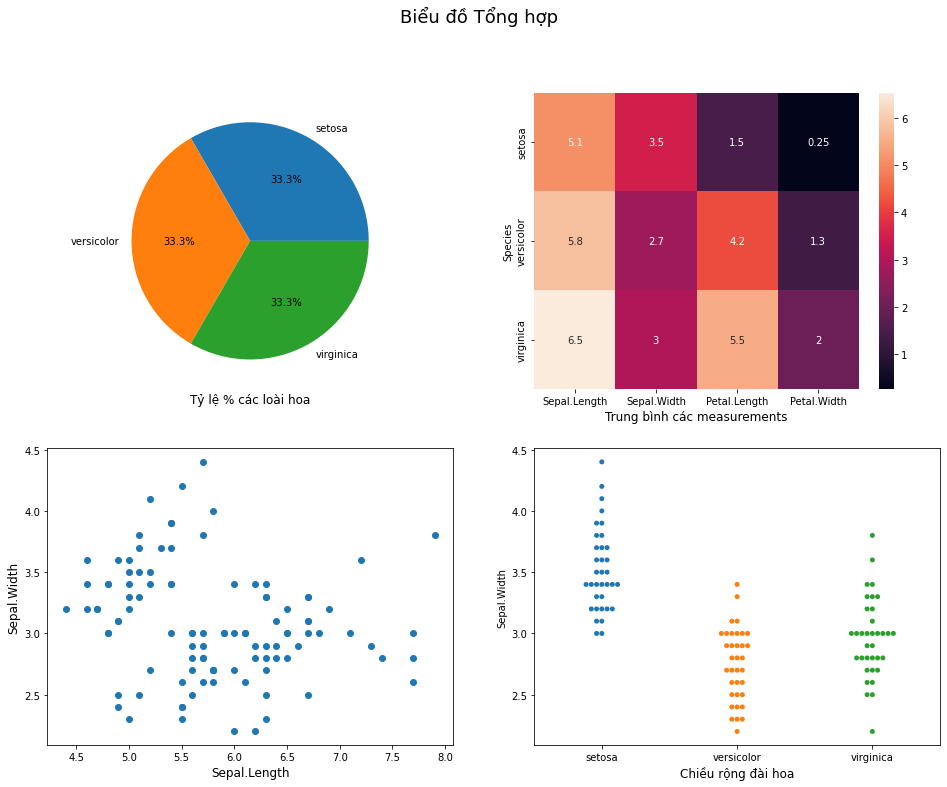

In [24]:
# Khởi tạo grid matrix
fg, ax = plt.subplots(2, 2, figsize=(16, 12))

# Visualize từng biểu đồ
# Biểu đồ [0, 0]
ax[0, 0].pie(y1, labels=x1, autopct='%1.1f%%')
ax[0, 0].set_xlabel("Tỷ lệ % các loài hoa", fontsize=12)

# Biểu đồ [0, 1]
sns.heatmap(df_summary, annot=True, ax=ax[0, 1])
ax[0, 1].set_xlabel('Trung bình các measurements', fontsize=12)

# Biểu đồ [1, 0]
ax[1, 0].scatter(x2, y2)
ax[1, 0].set_xlabel('Sepal.Length', fontsize=12)
ax[1, 0].set_ylabel('Sepal.Width', fontsize=12)

# Biểu đồ [1, 1]
sns.swarmplot(data=df_iris, x='Species', y='Sepal.Width', ax=ax[1, 1])
ax[1, 1].set_xlabel('Chiều rộng đài hoa', fontsize=12)

fg.suptitle('Biểu đồ Tổng hợp', fontsize=18)

# 4.5. Biểu đồ động từ gif file

Chúng ta thường dùng biểu đồ gif trong matplotlib để biểu diễn kết quả của những thuật toán một cách trực quan. Ví dụ như biểu diễn sự di chuyển của các điểm theo _gradient descent_.

In [25]:
# Import các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

ModuleNotFoundError: No module named 'imageio'

In [ ]:
%%script echo skipping
from google.colab import drive
import os

drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/mybook'
os.chdir(path)

!rm -rf gifplot
!mkdir gifplot

Khởi tạo một hàm số có đồ thị dạng sin theo công thức:

$$y = \sin(2\pi(x-0.01i))$$

In [ ]:
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    return x, y

Tiếp theo ta sẽ sinh các chuỗi dữ liệu $(x, y)$ thay đổi theo giá trị của $i$ và lưu những đồ thị này vào folder `gifplot`.

In [ ]:
def plot(i):
  x, y = animate(i)
  fig = plt.figure(figsize=(8, 6))
  plt.plot(x, y)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title("iteration {}".format(i))
  fig.savefig("gifplot/{:03d}.png".format(i))
  plt.close(fig)

Thực hiện vòng for vẽ liên tiếp 20 vòng lặp cho $i$.

In [ ]:
for i in range(20):
  plot(i)

Bản chất của file `gif` là một tập hợp các file ảnh thường được xếp chồng lên nhau. Do đó để tạo ra được một ảnh động `gif` thì chúng ta sẽ append các ảnh vào trong writer của `imageio`.

In [ ]:
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in os.listdir('gifplot'):
        image = imageio.imread('gifplot/{}'.format(filename))
        writer.append_data(image)

Như vậy toàn bộ các file ảnh đã được lưu theo thứ tự của vòng lặp vào file `mygif.gif`. Chúng ta có thể hiển thị đồ thị vừa được tạo ra như sau:

In [ ]:
from IPython.display import Image
Image(open('mygif.gif','rb').read())

# 4.6. Tổng kết

Như vậy qua bài viết này bạn đọc đã được tìm hiểu về cách dựng các dạng biểu đồ từ cơ bản tới nâng cao kèm theo tình huống sử dụng của chúng. Những biểu đồ này bao gồm:

* Biểu đồ cơ bản: line, barchart, pie, scatter.
* Biểu đồ nâng cao: boxplot, swarm, histogram, density, heatmap.

Ngoài ra bạn đọc còn được hướng dẫn về cách vẽ biểu đồ tổng hợp từ nhiều biểu đồ con và cách vẽ biểu đồ động từ gif file.

Đây đều là những kiến thức khá căn bản và quan trọng đối với visualization mà bạn đọc cần nắm vững trước khi đi sâu vào phân tích dữ liệu và xây dựng mô hình. Tiếp theo là những bài tập thực hành để củng cố thêm kiến thức đã học.

# 4.7. Bài tập

Lấy bộ dữ liệu flights.

In [ ]:
import seaborn as sns
flights = sns.load_dataset('flights')
flights.head()

Đây là bộ dữ liệu về số lượng hành cách di chuyển trên các chuyến bay theo các tháng. Dựa trên số liệu này hãy vẽ các biểu đồ:

1. Biểu đồ line thể hiện chu kỳ và xu hướng thay đổi của số lượng hành khách.
2. Biểu đồ hình tròn và biểu đồ cột về tổng số lượng hành khách đã di chuyển theo từng tháng trong suốt giai đoạn.
3. Biểu đồ heatmap thể hiện tổng số lượng hành khách theo hai trục tháng và năm.
4. Biểu đồ histogram, density, swarm, boxplot về phân phối tổng số lượng hành khách theo từng tháng.
5. Vẽ một biểu đồ tổng hợp dạng grid matrix từ những biểu đồ con trên.

# 4.6. Tài liệu tham khảo

1. [matplotlib](https://matplotlib.org/)
2. [seaborn](https://seaborn.pydata.org/)